# Musical Graph

Author: Pablo Villanueva-Domingo

In [1]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datapath = "data/"

dataname = "neofolk"
#dataname = "norwegian_black_metal"
#dataname = "valencian"
#dataname = "extremoduro"
dataname = "rock_radical_vasco"

filename = "data/"+dataname+".txt"

dataframe = pd.read_csv(filename, sep=';', names=['Band', 'Members', 'Collaborations'])
dataframe = dataframe.where(pd.notna(dataframe), None)
#dataframe.head()

In [3]:
def create_graph(dataframe, coll=True):

    # Create an empty graph
    graph = nx.Graph()
    
    # First, populate the graph nodes with all the considered bands 
    for i, band in dataframe.iterrows():

        graph.add_node(band["Band"], type="band")

    for i, band in dataframe.iterrows():

        #graph.add_node(band["Band"], type="band")
        
        if band["Members"] is not None:

            for member in band["Members"].split(","):
                if not (member in graph):

                    graph.add_node(member, type="person")

                graph.add_edge(band["Band"], member, type="member")
            
        if coll and band["Collaborations"] is not None:
            for person in band["Collaborations"].split(","):
                if not (person in graph):

                    graph.add_node(person, type="person")

                if not graph.has_edge(band["Band"], person):
                    graph.add_edge(band["Band"], person, type="collab")
            
        
    return graph

graph = create_graph(dataframe)
#graph.nodes(data=True)

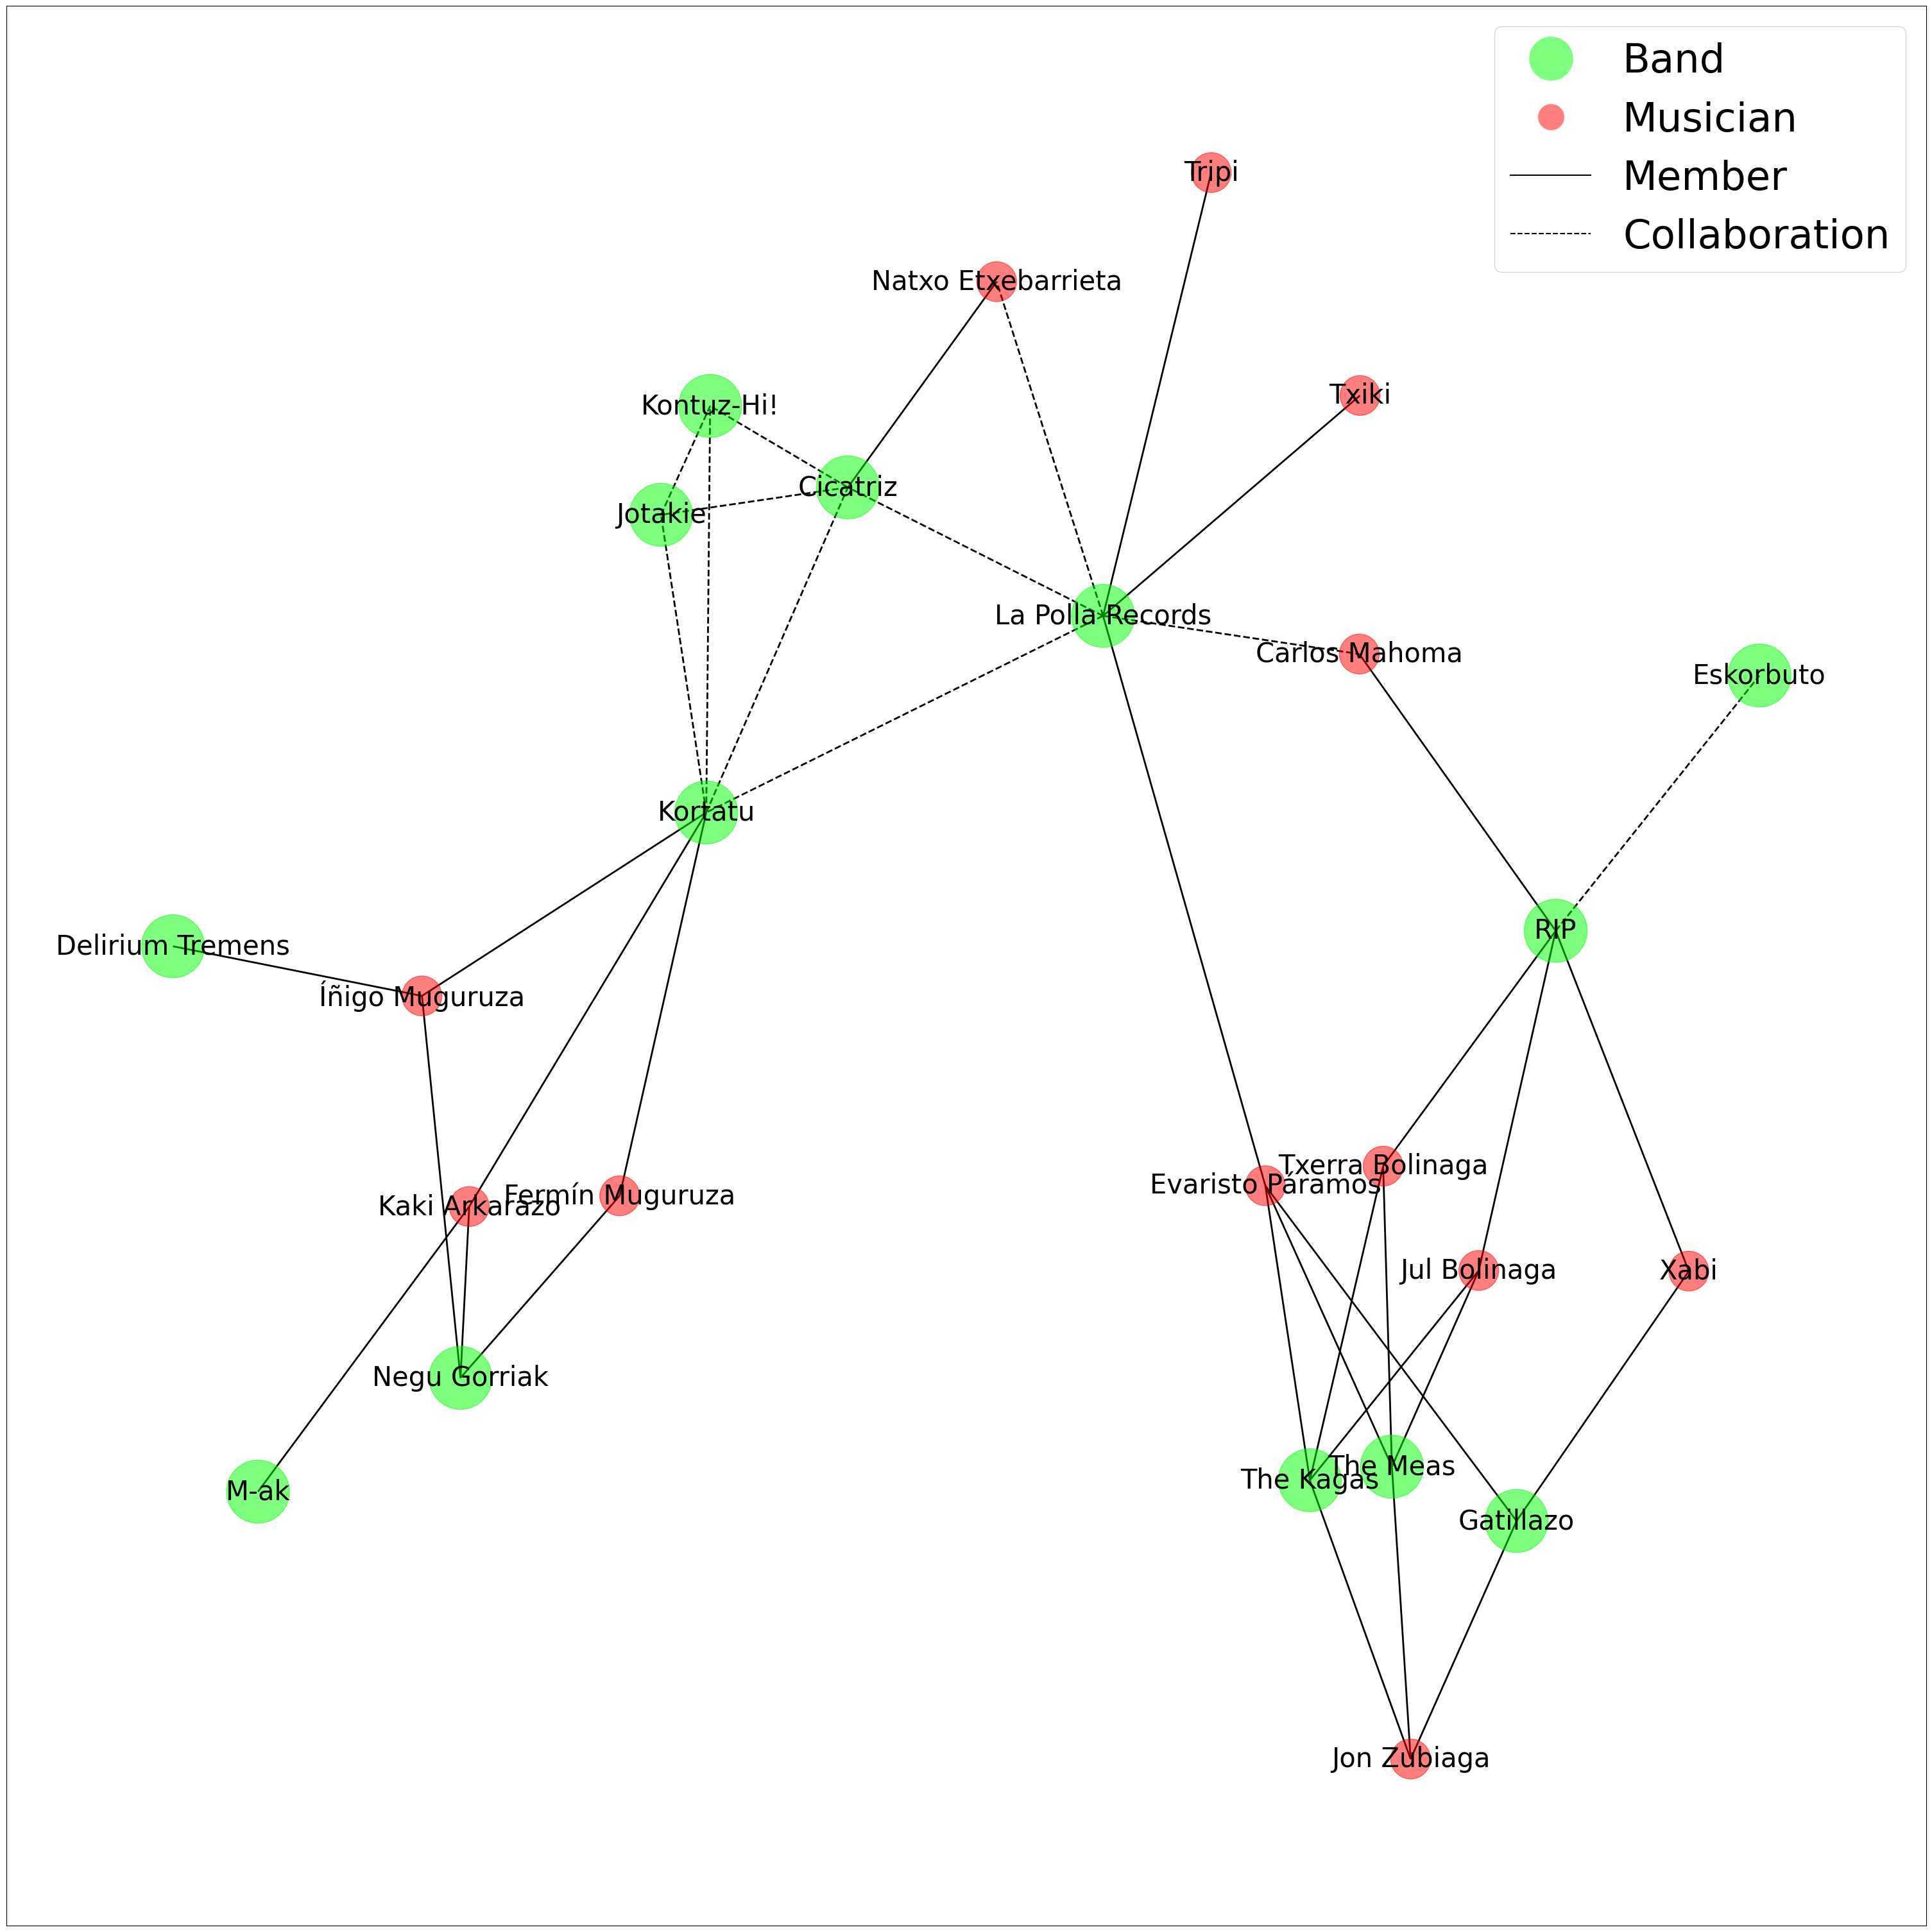

In [4]:
from matplotlib.lines import Line2D

col_band = (0,1,0,0.5)
col_person = (1,0,0,0.5)
size_band = 5000
size_person = 2000

fontsize = 30

figlen = 30
k_spring = 0.1

# Seed to achieve reproducibility
# Play with this number to get different visualizations
random_seed = 0

# Plot the graph
def plot_graph(graph, inigraph=None, k=None):
    
    fig, ax = plt.subplots(figsize=(figlen,figlen), layout="constrained")

    pos = nx.spring_layout(graph, k=k, iterations=20, seed=random_seed)
    
    node_types = nx.get_node_attributes(graph, "type")
    edge_types = nx.get_edge_attributes(graph, "type")
        
    colors = [col_band if node=="band" else col_person for node in node_types.values()]
    sizes = [size_band if node=="band" else size_person for node in node_types.values()]
    styles = ["-" if edge=="member" else "--" for edge in edge_types.values()]
    
    options = {"node_size": sizes, "node_color": colors, "style":styles, "width":2, "font_size":fontsize}
    
    nx.draw_networkx(graph, pos=pos, with_labels=True, **options)
    #nx.draw_circular(graph, pos=pos, with_labels=True, **options)
    
    line1 = Line2D([], [], color="white", marker='o', markersize=50, markerfacecolor=col_band)
    line2 = Line2D([], [], color="white", marker='o', markersize=30, markerfacecolor=col_person)
    line3 = Line2D([], [], color="k", linestyle='-')
    line4 = Line2D([], [], color="k", linestyle='--')
    plt.legend((line1, line2, line3, line4), ('Band', 'Musician', 'Member', 'Collaboration'), fontsize=1.5*fontsize)

    #fig.tight_layout()
    fig.savefig("examples/"+dataname+"_graph.png")
    plt.show()
    plt.close(fig)


plot_graph(graph, k=k_spring)